In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\USER\Downloads\Customer_Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,State,Region
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Bihar,East
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,Delhi,North
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,West Bengal,East
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Tamil Nadu,South
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,West Bengal,East


In [3]:
df.shape

(7043, 23)

In [4]:
df.isnull().sum().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 🧹 Data Cleaning & Transformation
- Handle missing values

In [7]:
# -----------------------------
# 🧹 Step 1: Clean the dataset
# -----------------------------

# Clean TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.strip(), errors='coerce')

# Drop rows with missing TotalCharges and reset index
df = df.dropna(subset=['TotalCharges']).copy()

# Now it's safe to encode Churn
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

### 📊 Analyze Customer Usage Behavior

In [10]:
# Analyze usage behavior: Internet, Streaming, Contract
print(df.groupby('InternetService')['Churn'].value_counts(normalize=True))
print(df.groupby('StreamingTV')['Churn'].value_counts(normalize=True))
print(df.groupby('Contract')['Churn'].value_counts(normalize=True))

InternetService  Churn
DSL              0        0.810017
                 1        0.189983
Fiber optic      0        0.581072
                 1        0.418928
No               0        0.925658
                 1        0.074342
Name: proportion, dtype: float64
StreamingTV          Churn
No                   0        0.664649
                     1        0.335351
No internet service  0        0.925658
                     1        0.074342
Yes                  0        0.698853
                     1        0.301147
Name: proportion, dtype: float64
Contract        Churn
Month-to-month  0        0.572903
                1        0.427097
One year        0        0.887228
                1        0.112772
Two year        0        0.971513
                1        0.028487
Name: proportion, dtype: float64


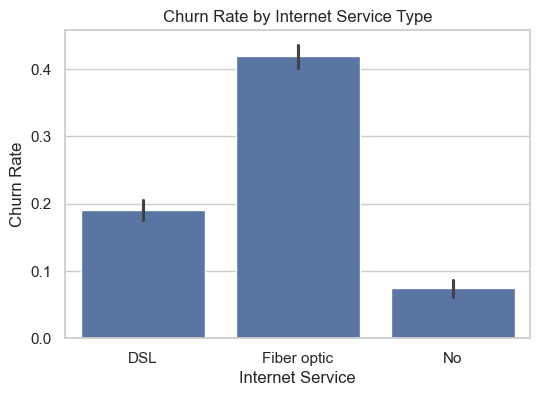

In [11]:
# Set plot style
sns.set(style='whitegrid')

# -----------------------------
# 1. Internet Service vs Churn
plt.figure(figsize=(6, 4))
sns.barplot(x='InternetService', y='Churn', data=df)
plt.title('Churn Rate by Internet Service Type')
plt.ylabel('Churn Rate')
plt.xlabel('Internet Service')
plt.show()

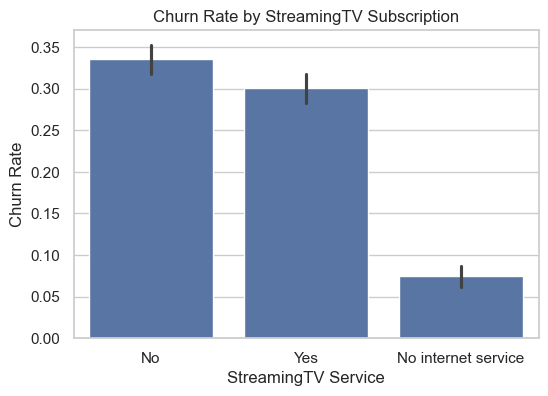

In [12]:
# -----------------------------
# 2. StreamingTV vs Churn
plt.figure(figsize=(6, 4))
sns.barplot(x='StreamingTV', y='Churn', data=df)
plt.title('Churn Rate by StreamingTV Subscription')
plt.ylabel('Churn Rate')
plt.xlabel('StreamingTV Service')
plt.show()

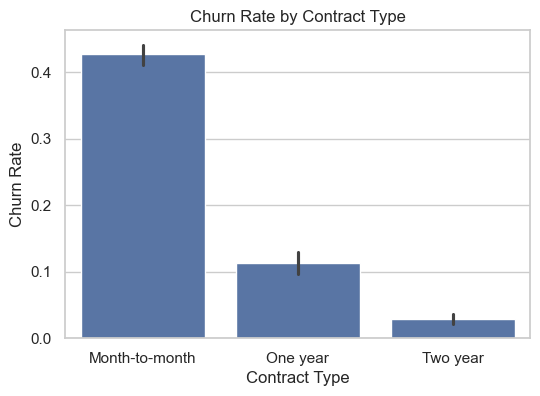

In [13]:
# -----------------------------
# 3. Contract Type vs Churn
plt.figure(figsize=(6, 4))
sns.barplot(x='Contract', y='Churn', data=df)
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.xlabel('Contract Type')
plt.show()

### 👥 Grouping by Demographics

In [15]:
# Churn rate by gender, senior citizen, partner
print(df.groupby(['gender'])['Churn'].mean())
print(df.groupby(['SeniorCitizen'])['Churn'].mean())
print(df.groupby(['Partner'])['Churn'].mean())

gender
Female    0.269595
Male      0.262046
Name: Churn, dtype: float64
SeniorCitizen
0    0.236503
1    0.416813
Name: Churn, dtype: float64
Partner
No     0.329761
Yes    0.197171
Name: Churn, dtype: float64


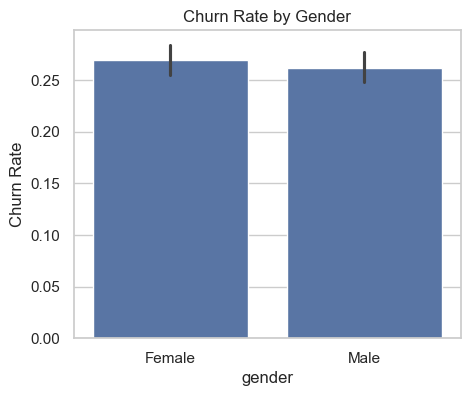

In [16]:
# -----------------------------
# 👥 Churn rate by Gender
plt.figure(figsize=(5, 4))
sns.barplot(data=df, x='gender', y='Churn')
plt.title('Churn Rate by Gender')
plt.ylabel('Churn Rate')
plt.show()

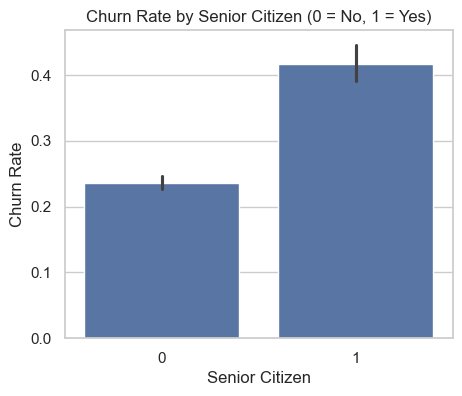

In [17]:
# -----------------------------
# 👴 Churn rate by Senior Citizen
plt.figure(figsize=(5, 4))
sns.barplot(data=df, x='SeniorCitizen', y='Churn')
plt.title('Churn Rate by Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Churn Rate')
plt.xlabel('Senior Citizen')
plt.show()

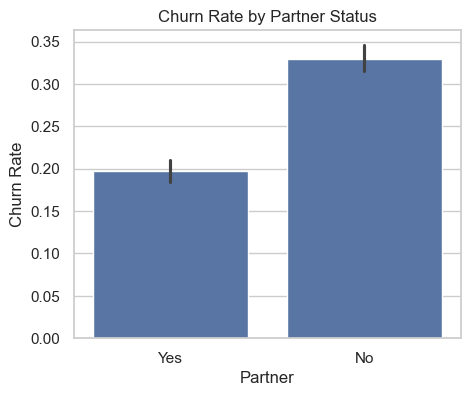

In [18]:
# -----------------------------
# ❤️ Churn rate by Partner
plt.figure(figsize=(5, 4))
sns.barplot(data=df, x='Partner', y='Churn')
plt.title('Churn Rate by Partner Status')
plt.ylabel('Churn Rate')
plt.show()

### 💸 Calculate Average Revenue Loss Due to Churn

In [20]:
# Average revenue loss
revenue_loss = df[df['Churn'] == 1]['MonthlyCharges'].mean()
print(f'Average Monthly Revenue Loss Due to Churn: ${revenue_loss:.2f}')

Average Monthly Revenue Loss Due to Churn: $74.44


### 📈 Feature Importance using Correlation

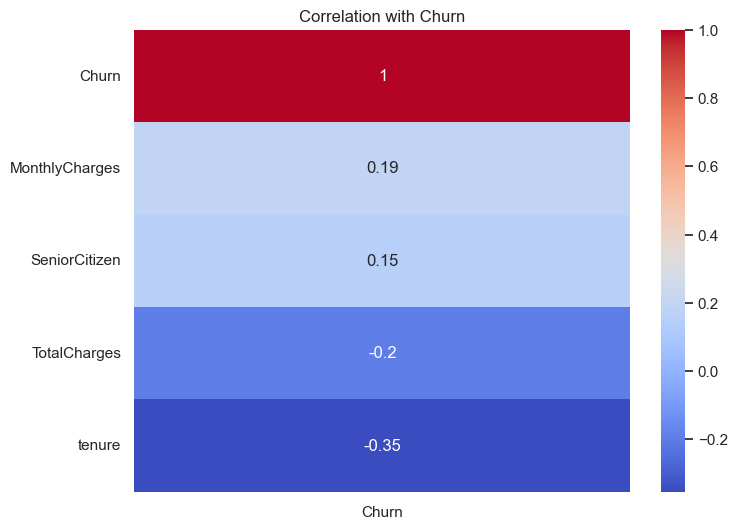

In [22]:
# Correlation heatmap
corr = df.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr[['Churn']].sort_values('Churn', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Churn')
plt.show()